# Simple Implementation of [DryBean](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset) dataset


In [250]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import datetime 
import os


dataLen = 13611

# Create a Sirectory to save weithgs and an plots [resource](https://stackoverflow.com/questions/1274405/how-to-create-new-folder)

In [251]:
def creatDirectory(path, params):
    '''
    creates a new directory to save figures and scores with input params a dictionary
    '''
    direc = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch={params['epochs']}_lr{params['lr']}/"
    if not os.path.exists(path + direc):
        os.makedirs(path + direc)

    return path + direc



In [252]:
def saveParams(path, params):
    fileName = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch={params['epochs']}_lr{params['lr']}.txt"
    f = open(path+fileName, "w")
    
    for key in params.keys(): 
        f.write(f"{key}={params[key]}\n")
    f.close()
    
def saveWeights(path, weights, params):
    name = f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch={params['epochs']}_lr{params['lr']}.npz"
    for x in weights:
        np.save(path+name, x)

# test
# epochs = 100
# lr = .3
# params = {'epochs': epochs, 'lr': lr}
# newDirec = creatDirectory(f"./train-dryBean/", params)
# saveParams(newDirec, params)
# saveWeights(newDirec,weights, params)

#  save losses and scores

In [253]:
def loadxlsx(fileName, dataLen):
    """
    loads a file.xsl into a numpy array
    filename: string
    dataLen: int
    
    return: 
    dataSetInput: n x n numpy ndarray every row represents a stream of input
    dataSetClass: n x 1 numpy ndarray

    """



     # Load the xlsx file
    excel_data = pd.read_excel(fileName)
    # Read the values of the file in the dataframe
    df = pd.DataFrame(excel_data)
    

    data= df.to_numpy()

    #data input ---> x
    data_in = [row[:-1] for row in data]
    dataSetInput = np.array(data_in, dtype=float)

    #data classes ---> groud truth
    data_class = [row[-1] for row in data]
    dataSetClass = np.array(data_class)
    
    return dataSetInput, dataSetClass



dataSetInput,dataSetClass = loadxlsx('dryBean-data/Dry_Bean_Dataset.xlsx', dataLen)
print(dataSetInput[0])
print(dataSetClass[0])

[2.83950000e+04 6.10291000e+02 2.08178117e+02 1.73888747e+02
 1.19719142e+00 5.49812187e-01 2.87150000e+04 1.90141097e+02
 7.63922518e-01 9.88855999e-01 9.58027126e-01 9.13357755e-01
 7.33150614e-03 3.14728917e-03 8.34222388e-01 9.98723889e-01]
SEKER


# Normalize the data

mean:  [5.30482845e+04 8.55283459e+02 3.20141867e+02 2.02270714e+02
 1.58324198e+00 7.50894929e-01 5.37682002e+04 2.53064220e+02
 7.49732787e-01 9.87142844e-01 8.73281831e-01 7.99863682e-01
 6.56360851e-03 1.71594733e-03 6.43590181e-01 9.95063312e-01]
std:  [2.93230185e+04 2.14281824e+02 8.56910379e+01 4.49684393e+01
 2.46669394e-01 9.19983835e-02 2.97738220e+04 5.91749462e+01
 4.90845636e-02 4.66020796e-03 5.95177014e-02 6.17111960e-02
 1.12795679e-03 5.95852967e-04 9.89925138e-02 4.36629734e-03]


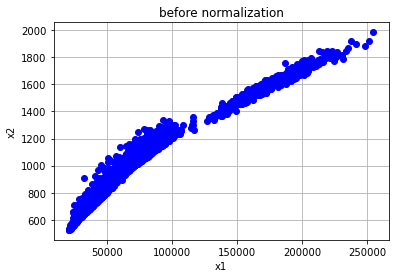

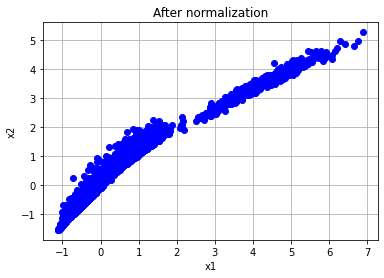

In [254]:
def normalizeData(dataSetInput, plot=False):
    """
    subtracting mean and dviding by the std
    
     dataSetInput: n x n numpy ndarray every row represents a stream of input
     plot: bolean weather to show plot or not

    """

    mean = np.mean(dataSetInput, axis=0)
    std = np.std(dataSetInput, axis=0)
    print ('mean: ', mean)
    print ('std: ', std)


    if plot: 
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("before normalization")
        plt.show()

    # normalizing the data
    dataSetInput -= mean
    dataSetInput /= std
    
    if plot:
        plt.plot(np.transpose(dataSetInput)[0], np.transpose(dataSetInput)[1], 'bo')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.grid(True)
        plt.title("After normalization")
        plt.show()

# test 
# x = np.array([[1., 2], [3, 4], [5, 6], [7, 8]])
# normalizeData(x, True)
# print(x)

normalizeData(dataSetInput, True) #our data is normalized

# generating true ouput

In [255]:
def generateOuput(class_l, dataSetClass):
    '''
    converts class names into vecor
    example: "classX" => [1, 0, 0, 0]
    class_l: list of strings of the name of the classes
    dataSetClass: numpy column vector of strings
    
    returns: a numpy matrix len(dataSetClas) x len(class_l)
    '''
    
    class_d = {}
    dataSetOutput = np.zeros((dataSetClass.shape[0], len(class_l)))
    
    for i in range(len(class_l)):
        class_d[class_l[i]] = i
        
    
    for i in range(len(dataSetClass)):
        c = dataSetClass[i]
        true_i = class_d[c]
        dataSetOutput[i][true_i] =1

    return dataSetOutput
    
classL = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
dataSetOutput =generateOuput(classL, dataSetClass)
print(dataSetOutput[10050])
    

[0. 0. 0. 0. 0. 1. 0.]


# Adding Bias

In [256]:
dataSetInput = np.append(dataSetInput, np.transpose([ np.ones(dataSetInput.shape[0]) ]), axis=1)
# testing 
# l = [[1, 2], [3, 4]]
# l = np.array(l)
# one = np.ones(l.shape[0])
# out = np.append(l, np.transpose([one]), axis=1)
# print(out)

# Split in train and test

In [257]:
# split into train and test
rand = np.random.rand(dataLen) 

#inputs
dataSetTestInput = dataSetInput[rand > .5]
dataSetInput = dataSetInput[rand <= .5]

#output
dataSetTestOutput = dataSetOutput[rand > .5]
dataSetOutput = dataSetOutput[rand <= .5]

print(dataSetTestInput.shape)
print(dataSetInput.shape)

print(dataSetTestOutput.shape)
print(dataSetOutput.shape)




(6819, 17)
(6792, 17)
(6819, 7)
(6792, 7)


# Activation Functions

In [258]:
#activation function 
act = {'leakRelu': lambda x:np.maximum(.001*x, x),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x:np.transpose(np.exp(x).T/np.sum(np.exp(x), axis=1))}


def leekRelyDrevative(x, leak):
    if len(x.shape) != 1:
        x_vec = x.reshape(x.shape[0]*x.shape[1])
    else:
        x_vec = x

    y = []
    for i in range(len(x_vec)):
        if x_vec[i] >0:
            y.append(1)
            
        elif x_vec[i]<0:
            y.append(leak)
            
        else:
            y.append(0)

    y = np.array(y)
    return y.reshape(x.shape)


actDrevative = {'leakRelu':lambda x: leekRelyDrevative(x, .001),
       'tanch': lambda x:np.tanh(x),
        'sigmoid': lambda x: act['sigmoid'](x)*(1-act['sigmoid'](x))}

# Test
# x = np.array([1, 2, 3, 4, -10])
# y = actDrevative['leakRelu'](x)
# print(x)
# print(y)


# Defining  hidden layers

W.shape= (17, 50)


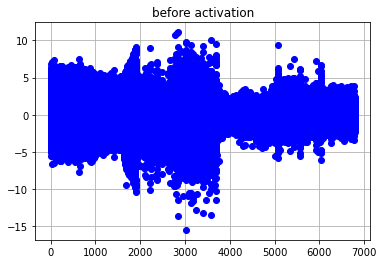

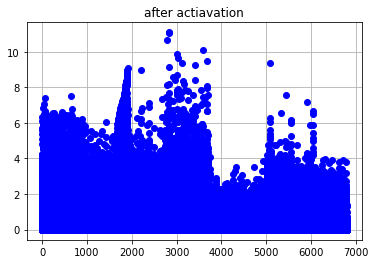

W.shape= (50, 7)


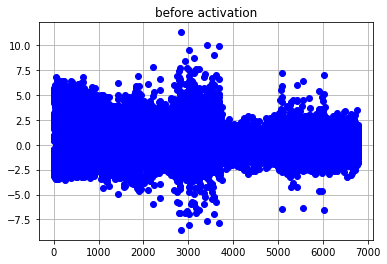

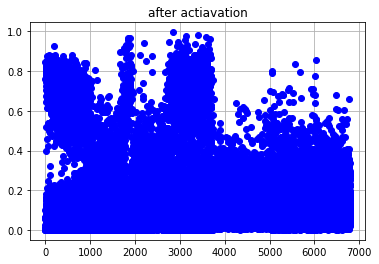

In [259]:
#init weights 
hiddenLayerSizes = [50, 7]
nonlinearities = ['leakRelu']*(len(hiddenLayerSizes)-1) + ['sigmoid']
weights = []



#forward path
Hsaved = {}
for i in range (len(hiddenLayerSizes)): 
    X = dataSetInput if i==0 else Hsaved[i-1] 
    fan_in = X.shape[1] 
    fan_out = hiddenLayerSizes[i] #selecting the size of the hidden layer 
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2) 
    weights.append(W)  #saving weights
    print ("W.shape=", W.shape)
    
    H = np.matmul(X, W) #matrix multplixation
   
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("before activation")
    plt.show()

    H = act[nonlinearities[i]](H)  #applying activation function 
    
    
    plt.plot(H, 'bo')
    plt.grid(True)
    plt.title("after actiavation")
    plt.show()
    
    Hsaved[i] = H # saveing resluts to use it to the next loop



# loss function [cross Entropy](https://gist.github.com/Atlas7/22372a4f6b0846cfc3797766d7b529e8)

In [260]:
# loass function 
def my_log(x):
    y = np.zeros(x.shape)
    
    if len(x.shape) == 1:
        for i in range(x.shape[0]):
            if x[i] != 0:
                y[i] = np.log(x[i])
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if x[i][j] != 0:
                    y[i][j] = np.log(x[i][j])
    return y

#test
# print(my_log(np.array([3, 4, 0])))


def crossEntropyLoss(trueY, predictY):
                    
    loss=-(1.0/trueY.shape[0])* np.sum(trueY*my_log(predictY) + (1-trueY)*my_log(1-predictY))
    
    return loss
#test
# print(crossEntropyLoss(dataSetOutput[:2], np.array([[1, 0, 0], [.3, .4, 0]])))


#loss dervative
def crossEntropyLossDrvative(trueY, predictY):
    d= -(1.0/trueY.shape[0])* (trueY/predictY - (1-trueY)/(1-predictY))
    return d

# test
# print("test loss dervative:", crossEntropyLossDrvative(np.array([[1, 0, 0], [0, 1, 0]]), np.array([[.2, .7, 0.1], [.3, .4, .3]])) )   

# Forward Path

In [261]:
#forward path
def forward(dataInput, plot=False, debug=False):
    outputFlow_list = []
    outputFlow_list.append(dataInput)
    
    for i in range (len(hiddenLayerSizes)): 
        X = outputFlow_list[-1] 
        W = weights[i]
        
        H = np.matmul(X, W) #matrix multplixation
        if debug:
            print("X: ", X.shape, ", W:", W.shape, " =H.shape=", H.shape)
        outputFlow_list.append(H)

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("before activation")
            plt.show()

        H = act[nonlinearities[i]](H)  #applying activation function 
        if debug:
            print("after activation H: ",H.shape)
        outputFlow_list.append(H) # saveing resluts to use it to the next loop

        if plot:
            plt.plot(H, 'bo')
            plt.grid(True)
            plt.title("after actiavation")
            plt.show()

        
    
    return outputFlow_list

# test loop
outputFlow_list = forward(dataSetInput)
for i in range(len(outputFlow_list)): 
    print("flow[", i, ']=', outputFlow_list[i][:1])
    print("flow[", i, ']=', outputFlow_list[i].shape)

flow[ 0 ]= [[-0.78574055 -0.97721522 -1.27882531 -0.43929028 -1.74161826 -2.74221072
  -0.77397521 -0.97333689  0.67125962 -2.24176709  0.51504917  2.08171549
   0.40171781  2.51507474  2.20424996 -0.19798544  1.        ]]
flow[ 0 ]= (6792, 17)
flow[ 1 ]= [[-2.45120392 -3.30863181  1.03818222  0.51501203  2.82826528  1.29803658
  -1.49000397  0.77323362  0.14902094 -2.96339413  2.71312074  3.31415244
   1.95253334 -4.10936936 -0.65218568  2.59087002 -1.86705251 -0.66806181
  -2.532432    1.93535093  3.57689921 -2.50620243 -1.41338956  0.10468692
   0.35416934  1.34038382  2.67210088  1.04214235 -2.26771909  1.15108945
   0.26859124  0.42409268  3.42964814 -3.14730701 -4.18104026  0.15184854
  -1.0048267  -2.39436534 -0.28867612  0.66549597 -2.38758217 -1.9685206
   3.44772733  1.89618826 -1.35648469  2.76913231 -0.19586453 -2.25182484
  -1.58920897 -3.25922281]]
flow[ 1 ]= (6792, 50)
flow[ 2 ]= [[-2.45120392e-03 -3.30863181e-03  1.03818222e+00  5.15012031e-01
   2.82826528e+00  1.29803

# BackPropagation

In [262]:
# back brobagation
def backpropagationDetailed(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    y_hat = outputFlow_list[-1] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative = ",drev.shape, drev[:1] )
        print()
    
    #2- sigmoid
    yBeforeSig  = outputFlow_list[-2]
    sigmoidDrev = actDrevative['sigmoid'](yBeforeSig) # 150 x 3
    drev = drev * sigmoidDrev
    if debug:
        print("2- dervative = ",drev.shape, drev[:1] )
        print("y-sigmoidDrev-inupt=", yBeforeSig[:1])
        print("y-sigmoidDrev-output=", sigmoidDrev[:1])
        print()


    
    # 3- hidden layer (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-3]), drev) # (10 x 150) (150 x 3) = (10 x 3)
    weights[-1] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
    
    drev = np.matmul(drev, np.transpose(weights[-1])) # (150 x 3) (3 x 10) = (150 x 10)
    if debug:
        print("3- dervative = ",drev.shape, drev[:1] )
        print()

    
    #4- reulu
    reluDev = actDrevative['leakRelu'](outputFlow_list[-4])  # 150 x 10
#     reluDev = np.random.rand(150, 10)
    drev = drev * reluDev # elemet wise product
    if debug:
        print("reludev input=", outputFlow_list[-4][:1])
        print("reludev output", reluDev[:1])
        print("4- drevative = ",drev.shape, drev[:1] )
        print()

    
    #4- layer 1 output (gradient)
    grad_step = np.matmul(np.transpose(outputFlow_list[-5]), drev) # x(5 x 150) (150 x 10) = (5 x 10)
    weights[-2] -= lr * grad_step
    if debug:
        print("grad-step= ",grad_step.shape, grad_step[:1])
        
    drev = np.matmul(drev, np.transpose(weights[-2])) # (150 x 10) (10 x 4) = (150 x 4)
                                                      # for the bias and gradient of the input
    if debug:
        print("5- dervative = ",drev.shape, drev[:1] )

    
    
    

# Generic backpropagation

In [263]:
# back brobagation
def backpropagationGeneric(lr, outputFlow_list, debug=False):
    derv = None # the variable that will hold the chain rule product 
    backIndex = -1
    y_hat = outputFlow_list[backIndex] # the output of our netwok
    
    #1- loss dervative
    drev = crossEntropyLossDrvative(dataSetOutput, y_hat)
    if debug:
        print("1- dervative (loss) = ",drev.shape, drev[:1] )
        print()
    
    # looping over all hidden layers
    for i in range(len(hiddenLayerSizes)-1, -1, -1):
        # 1- activation
        backIndex -= 1
        beforeActivaion  = outputFlow_list[backIndex]
        activationDrev = actDrevative[nonlinearities[i]](beforeActivaion) # 150 x 3
        drev = drev * activationDrev
        if debug:
            print("1- dervative = ",drev.shape, drev[:1] )
            print("y-before-activation=", beforeActivaion[:1])
            print("y-activation-dervative=", activationDrev[:1])
            print()     
        
        # 2- grad
        backIndex -= 1
        X = outputFlow_list[backIndex]
        grad_step = np.matmul(np.transpose(X), drev) # (10 x 150) (150 x 3) = (10 x 3)
        weights[i] -= lr * grad_step
        if debug:
            print("2- grad-step= ",grad_step.shape, grad_step[:1])

        
        # 3 drev throw the path
        drev = np.matmul(drev, np.transpose(weights[i])) # (150 x 3) (3 x 10) = (150 x 10)
        if debug:
            print("3- dervative = ",drev.shape, drev[:1] )
            print()

    
    


# Testing 

In [264]:
# evaluating test

def test(trueY, predictY, dataSetClass=1):
    """
    performing test and returns the accuracy of the data
    TODO return class names
    """
    predictIndex = np.argmax(predictY, axis=1) #along rows

    truePredicts =0
    counter =0
    for i in predictIndex:
        if trueY[counter][i] == 1:
            truePredicts +=1
        counter +=1
    return truePredicts/trueY.shape[0]



# Train

In [265]:
lossL = []
scoreL = []
def train(epochs, lr):
   
    for i in range(epochs):
        #forward
        outputFlow_list = forward(dataSetInput)

        #loss calculations
        loss = crossEntropyLoss(dataSetOutput, outputFlow_list[-1])
        lossL.append(loss)
        
        
        #backpropagation
#         backpropagationDetailed(lr, outputFlow_list, debug=False)
        backpropagationGeneric(lr, outputFlow_list, debug=False)

        
        # TESTING
        #forward
        outputFlow_list = forward(dataSetTestInput)
        #evaluationg score
        score = test(dataSetTestOutput, outputFlow_list[-1])
        scoreL.append(score)
    

        
        print("Epoch: ",i, ", Loss=", loss, ", Score=", score )
        

Epoch:  0 , Loss= 3.374845370407356 , Score= 0.5623991787652148
Epoch:  1 , Loss= 1.8599325760912724 , Score= 0.6512685144449333
Epoch:  2 , Loss= 1.5519384088357908 , Score= 0.6904238158087697
Epoch:  3 , Loss= 1.3541112941865083 , Score= 0.7636017011291978
Epoch:  4 , Loss= 1.2387173814147636 , Score= 0.7968910397418977
Epoch:  5 , Loss= 1.1376487426091986 , Score= 0.8136090335826367
Epoch:  6 , Loss= 1.0682778361929963 , Score= 0.8336999560052794
Epoch:  7 , Loss= 1.0053369014105349 , Score= 0.8411790585129785
Epoch:  8 , Loss= 0.9559602869692904 , Score= 0.8536442293591435
Epoch:  9 , Loss= 0.91180512738133 , Score= 0.859803490247837
Epoch:  10 , Loss= 0.8741512856781367 , Score= 0.8675758908930928
Epoch:  11 , Loss= 0.8404832880782602 , Score= 0.8737351517817862
Epoch:  12 , Loss= 0.8105917184211263 , Score= 0.878281272913917
Epoch:  13 , Loss= 0.7836875446149606 , Score= 0.8810676052207068
Epoch:  14 , Loss= 0.7593926515876708 , Score= 0.8851737791465024
Epoch:  15 , Loss= 0.7373

Epoch:  124 , Loss= 0.3849119604082162 , Score= 0.9212494500659921
Epoch:  125 , Loss= 0.38447559912734186 , Score= 0.9213960991347705
Epoch:  126 , Loss= 0.38404587818757313 , Score= 0.9215427482035489
Epoch:  127 , Loss= 0.3836214641673066 , Score= 0.9215427482035489
Epoch:  128 , Loss= 0.38320267919849493 , Score= 0.9216893972723273
Epoch:  129 , Loss= 0.3827887542784649 , Score= 0.9216893972723273
Epoch:  130 , Loss= 0.38237959804044624 , Score= 0.9218360463411057
Epoch:  131 , Loss= 0.38197495817620375 , Score= 0.9218360463411057
Epoch:  132 , Loss= 0.3815763128883494 , Score= 0.9218360463411057
Epoch:  133 , Loss= 0.3811846110290012 , Score= 0.9216893972723273
Epoch:  134 , Loss= 0.3807987495053717 , Score= 0.9216893972723273
Epoch:  135 , Loss= 0.3804190359043779 , Score= 0.9218360463411057
Epoch:  136 , Loss= 0.380043804914411 , Score= 0.9216893972723273
Epoch:  137 , Loss= 0.37967275322683336 , Score= 0.9218360463411057
Epoch:  138 , Loss= 0.3793068269279208 , Score= 0.9218360

Epoch:  246 , Loss= 0.35549658699369946 , Score= 0.9241824314415603
Epoch:  247 , Loss= 0.35536300951298755 , Score= 0.9243290805103388
Epoch:  248 , Loss= 0.3552297403318074 , Score= 0.9243290805103388
Epoch:  249 , Loss= 0.3550979615695245 , Score= 0.9243290805103388
Epoch:  250 , Loss= 0.35496688380645414 , Score= 0.9243290805103388
Epoch:  251 , Loss= 0.3548360491187742 , Score= 0.9243290805103388
Epoch:  252 , Loss= 0.3547065912140951 , Score= 0.9243290805103388
Epoch:  253 , Loss= 0.3545780377498063 , Score= 0.9241824314415603
Epoch:  254 , Loss= 0.35445041205081396 , Score= 0.9241824314415603
Epoch:  255 , Loss= 0.35432386340976163 , Score= 0.9241824314415603
Epoch:  256 , Loss= 0.3541981090564736 , Score= 0.9241824314415603
Epoch:  257 , Loss= 0.35407336068629053 , Score= 0.9241824314415603
Epoch:  258 , Loss= 0.35394971511463935 , Score= 0.9243290805103388
Epoch:  259 , Loss= 0.353826961298446 , Score= 0.9243290805103388
Epoch:  260 , Loss= 0.35370547629773164 , Score= 0.92432

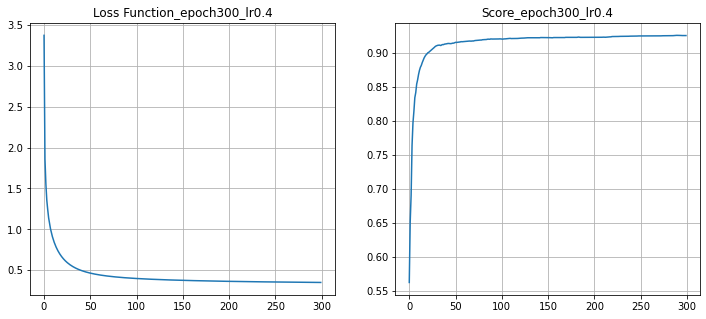

Epoch:  0 , Loss= 0.3494503430738245 , Score= 0.9249156767854524
Epoch:  1 , Loss= 0.3494030019051072 , Score= 0.9249156767854524
Epoch:  2 , Loss= 0.34935584926698704 , Score= 0.9249156767854524
Epoch:  3 , Loss= 0.3493086091909482 , Score= 0.9249156767854524
Epoch:  4 , Loss= 0.3492614500592052 , Score= 0.9249156767854524
Epoch:  5 , Loss= 0.349214426481816 , Score= 0.9249156767854524
Epoch:  6 , Loss= 0.34916762683863606 , Score= 0.9249156767854524
Epoch:  7 , Loss= 0.3491209994351505 , Score= 0.9249156767854524
Epoch:  8 , Loss= 0.34907458758458776 , Score= 0.9249156767854524
Epoch:  9 , Loss= 0.3490283253552393 , Score= 0.9249156767854524
Epoch:  10 , Loss= 0.3489822053383803 , Score= 0.9249156767854524
Epoch:  11 , Loss= 0.3489362595301575 , Score= 0.9249156767854524
Epoch:  12 , Loss= 0.3488904077198753 , Score= 0.9249156767854524
Epoch:  13 , Loss= 0.34884464289215045 , Score= 0.9249156767854524
Epoch:  14 , Loss= 0.348798899139226 , Score= 0.9249156767854524
Epoch:  15 , Loss=

Epoch:  124 , Loss= 0.344467834075724 , Score= 0.9250623258542309
Epoch:  125 , Loss= 0.344433622513661 , Score= 0.9249156767854524
Epoch:  126 , Loss= 0.3443995019706904 , Score= 0.9249156767854524
Epoch:  127 , Loss= 0.34436545997710727 , Score= 0.9250623258542309
Epoch:  128 , Loss= 0.3443314959088884 , Score= 0.9250623258542309
Epoch:  129 , Loss= 0.3442976367694008 , Score= 0.9250623258542309
Epoch:  130 , Loss= 0.34426382793660604 , Score= 0.9252089749230092
Epoch:  131 , Loss= 0.3442300853572603 , Score= 0.9252089749230092
Epoch:  132 , Loss= 0.34419649268448976 , Score= 0.9252089749230092
Epoch:  133 , Loss= 0.34416299367131975 , Score= 0.9252089749230092
Epoch:  134 , Loss= 0.34412937065461946 , Score= 0.9252089749230092
Epoch:  135 , Loss= 0.3440958068101913 , Score= 0.9252089749230092
Epoch:  136 , Loss= 0.3440623495821892 , Score= 0.9252089749230092
Epoch:  137 , Loss= 0.34402900432805855 , Score= 0.9250623258542309
Epoch:  138 , Loss= 0.34399575008294414 , Score= 0.9250623

Epoch:  246 , Loss= 0.34078598326244514 , Score= 0.925795571198123
Epoch:  247 , Loss= 0.3407591378527436 , Score= 0.925795571198123
Epoch:  248 , Loss= 0.34073229423893614 , Score= 0.925795571198123
Epoch:  249 , Loss= 0.34070547308233456 , Score= 0.925795571198123
Epoch:  250 , Loss= 0.34067861855835063 , Score= 0.925795571198123
Epoch:  251 , Loss= 0.34065186410729476 , Score= 0.925795571198123
Epoch:  252 , Loss= 0.34062522706022885 , Score= 0.925795571198123
Epoch:  253 , Loss= 0.34059862712198713 , Score= 0.925795571198123
Epoch:  254 , Loss= 0.34057209682427303 , Score= 0.925795571198123
Epoch:  255 , Loss= 0.3405456066936398 , Score= 0.925795571198123
Epoch:  256 , Loss= 0.34051917626612344 , Score= 0.925795571198123
Epoch:  257 , Loss= 0.34049276592707767 , Score= 0.925795571198123
Epoch:  258 , Loss= 0.3404663826597656 , Score= 0.925795571198123
Epoch:  259 , Loss= 0.34044004693596186 , Score= 0.925795571198123
Epoch:  260 , Loss= 0.34041375435915566 , Score= 0.92579557119812

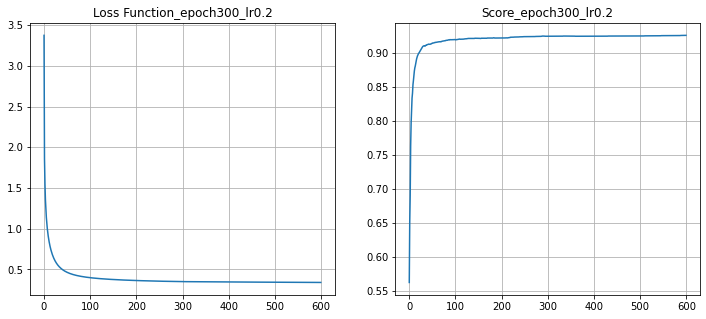

Epoch:  0 , Loss= 0.3394005978872963 , Score= 0.9262355184044582
Epoch:  1 , Loss= 0.33938833906742016 , Score= 0.9262355184044582
Epoch:  2 , Loss= 0.33937605740033183 , Score= 0.9262355184044582
Epoch:  3 , Loss= 0.3393637754607404 , Score= 0.9262355184044582
Epoch:  4 , Loss= 0.3393515068587097 , Score= 0.9262355184044582
Epoch:  5 , Loss= 0.33933924368634133 , Score= 0.9262355184044582
Epoch:  6 , Loss= 0.3393269807068026 , Score= 0.9262355184044582
Epoch:  7 , Loss= 0.3393147379314013 , Score= 0.9262355184044582
Epoch:  8 , Loss= 0.33930250342495943 , Score= 0.9262355184044582
Epoch:  9 , Loss= 0.3392902618521414 , Score= 0.9262355184044582
Epoch:  10 , Loss= 0.3392780505832248 , Score= 0.9262355184044582
Epoch:  11 , Loss= 0.33926583504500923 , Score= 0.9262355184044582
Epoch:  12 , Loss= 0.33925363477590453 , Score= 0.9262355184044582
Epoch:  13 , Loss= 0.33924144539977 , Score= 0.9262355184044582
Epoch:  14 , Loss= 0.33922927201214215 , Score= 0.9262355184044582
Epoch:  15 , Lo

Epoch:  124 , Loss= 0.33794465012471947 , Score= 0.9266754656107934
Epoch:  125 , Loss= 0.33793342566013007 , Score= 0.9266754656107934
Epoch:  126 , Loss= 0.3379222096579777 , Score= 0.9266754656107934
Epoch:  127 , Loss= 0.3379110055136971 , Score= 0.9266754656107934
Epoch:  128 , Loss= 0.33789980562652794 , Score= 0.9266754656107934
Epoch:  129 , Loss= 0.33788860877025056 , Score= 0.9266754656107934
Epoch:  130 , Loss= 0.3378774090904391 , Score= 0.9266754656107934
Epoch:  131 , Loss= 0.33786623250148523 , Score= 0.9266754656107934
Epoch:  132 , Loss= 0.3378550543871213 , Score= 0.9266754656107934
Epoch:  133 , Loss= 0.33784385985010484 , Score= 0.9266754656107934
Epoch:  134 , Loss= 0.33783268728412025 , Score= 0.9265288165420149
Epoch:  135 , Loss= 0.33782151722021453 , Score= 0.9265288165420149
Epoch:  136 , Loss= 0.33781035802063214 , Score= 0.9265288165420149
Epoch:  137 , Loss= 0.3377992170664828 , Score= 0.9265288165420149
Epoch:  138 , Loss= 0.3377880826035314 , Score= 0.926

Epoch:  246 , Loss= 0.3366418278386879 , Score= 0.9265288165420149
Epoch:  247 , Loss= 0.33663168101953306 , Score= 0.9265288165420149
Epoch:  248 , Loss= 0.33662150902029164 , Score= 0.9265288165420149
Epoch:  249 , Loss= 0.3366113513533836 , Score= 0.9265288165420149
Epoch:  250 , Loss= 0.33660119814038725 , Score= 0.9265288165420149
Epoch:  251 , Loss= 0.3365910557045028 , Score= 0.9265288165420149
Epoch:  252 , Loss= 0.33658092323063027 , Score= 0.9265288165420149
Epoch:  253 , Loss= 0.336570776941164 , Score= 0.9265288165420149
Epoch:  254 , Loss= 0.3365606558994229 , Score= 0.9265288165420149
Epoch:  255 , Loss= 0.33655053959559267 , Score= 0.9265288165420149
Epoch:  256 , Loss= 0.33654042408511603 , Score= 0.9265288165420149
Epoch:  257 , Loss= 0.3365303320989982 , Score= 0.9265288165420149
Epoch:  258 , Loss= 0.3365202372415679 , Score= 0.9265288165420149
Epoch:  259 , Loss= 0.3365101468539837 , Score= 0.9265288165420149
Epoch:  260 , Loss= 0.33650006203982086 , Score= 0.926528

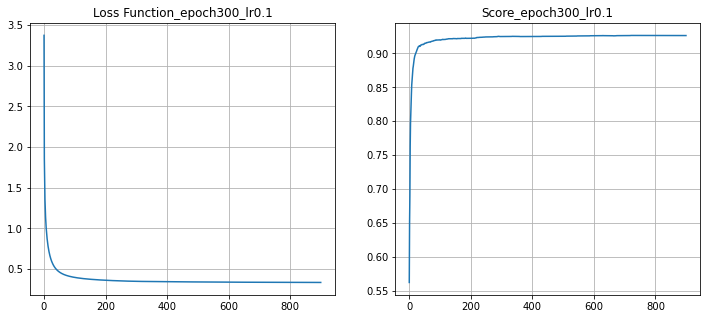

Epoch:  0 , Loss= 0.33610095351393515 , Score= 0.9263821674732365
Epoch:  1 , Loss= 0.3360960693149275 , Score= 0.9263821674732365
Epoch:  2 , Loss= 0.3360911885777171 , Score= 0.9263821674732365
Epoch:  3 , Loss= 0.33608631621569385 , Score= 0.9263821674732365
Epoch:  4 , Loss= 0.336081453541764 , Score= 0.9263821674732365
Epoch:  5 , Loss= 0.33607658494760345 , Score= 0.9263821674732365
Epoch:  6 , Loss= 0.33607172158571746 , Score= 0.9263821674732365
Epoch:  7 , Loss= 0.3360668599465283 , Score= 0.9263821674732365
Epoch:  8 , Loss= 0.33606198978005764 , Score= 0.9263821674732365
Epoch:  9 , Loss= 0.33605712459800907 , Score= 0.9263821674732365
Epoch:  10 , Loss= 0.3360522623065691 , Score= 0.9263821674732365
Epoch:  11 , Loss= 0.33604739152932717 , Score= 0.9263821674732365
Epoch:  12 , Loss= 0.33604253137773676 , Score= 0.9263821674732365
Epoch:  13 , Loss= 0.33603767321654404 , Score= 0.9263821674732365
Epoch:  14 , Loss= 0.3360328157907592 , Score= 0.9263821674732365
Epoch:  15 ,

Epoch:  124 , Loss= 0.33550583814909274 , Score= 0.9265288165420149
Epoch:  125 , Loss= 0.3355011230291849 , Score= 0.9265288165420149
Epoch:  126 , Loss= 0.3354964142055659 , Score= 0.9265288165420149
Epoch:  127 , Loss= 0.33549170539232986 , Score= 0.9265288165420149
Epoch:  128 , Loss= 0.33548699404787685 , Score= 0.9265288165420149
Epoch:  129 , Loss= 0.3354822902201282 , Score= 0.9265288165420149
Epoch:  130 , Loss= 0.3354775834347166 , Score= 0.9266754656107934
Epoch:  131 , Loss= 0.33547288370613465 , Score= 0.9266754656107934
Epoch:  132 , Loss= 0.3354681798496363 , Score= 0.9266754656107934
Epoch:  133 , Loss= 0.33546347806547094 , Score= 0.9266754656107934
Epoch:  134 , Loss= 0.33545877704420457 , Score= 0.9266754656107934
Epoch:  135 , Loss= 0.33545407975012786 , Score= 0.9266754656107934
Epoch:  136 , Loss= 0.3354493860233893 , Score= 0.9266754656107934
Epoch:  137 , Loss= 0.33544469149893025 , Score= 0.9266754656107934
Epoch:  138 , Loss= 0.33543999953675113 , Score= 0.926

Epoch:  246 , Loss= 0.3349407509378122 , Score= 0.9268221146795718
Epoch:  247 , Loss= 0.3349362096946333 , Score= 0.9268221146795718
Epoch:  248 , Loss= 0.3349316682604162 , Score= 0.9268221146795718
Epoch:  249 , Loss= 0.33492713067599733 , Score= 0.9268221146795718
Epoch:  250 , Loss= 0.3349225926364272 , Score= 0.9268221146795718
Epoch:  251 , Loss= 0.33491805482040277 , Score= 0.9268221146795718
Epoch:  252 , Loss= 0.334913518554833 , Score= 0.9268221146795718
Epoch:  253 , Loss= 0.33490898506580885 , Score= 0.9268221146795718
Epoch:  254 , Loss= 0.3349044513392523 , Score= 0.9268221146795718
Epoch:  255 , Loss= 0.33489992269091257 , Score= 0.9268221146795718
Epoch:  256 , Loss= 0.33489539363620635 , Score= 0.9268221146795718
Epoch:  257 , Loss= 0.33489086632725873 , Score= 0.9269687637483502
Epoch:  258 , Loss= 0.3348863408144963 , Score= 0.9269687637483502
Epoch:  259 , Loss= 0.33488181693379 , Score= 0.9269687637483502
Epoch:  260 , Loss= 0.3348772948759287 , Score= 0.926968763

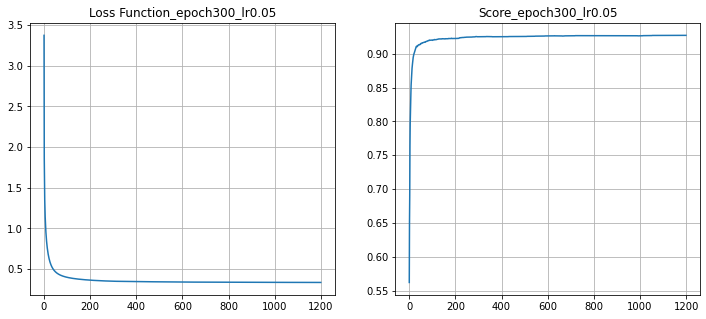

In [266]:
epochs = 300

lr_L = [.4, .2, .1, .05]
for i in lr_L:
    lr = i
    train(epochs, lr)
    
    print("max-score=", np.max(scoreL))
    print("avg-score=", np.average(scoreL))
    print("last-loss=", lossL[-1])

    # Saving Results
    params = {'epochs': epochs, 'lr': lr, 
             'max-score': np.max(scoreL), "avg-score=": np.average(scoreL), 
              "last-loss=":  lossL[-1]
             }
    newDirec = creatDirectory(f"./train-dryBean/", params)
    saveParams(newDirec, params)
    saveWeights(newDirec,weights, params)

    fig = plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(lossL)
    plt.grid(True)
    plt.title(f"Loss Function_epoch{epochs}_lr{lr}")
    # plt.show()
    # fig.savefig(newDirec+f'loss_epoch{epochs}_lr{lr}_{ datetime.datetime.now()}.jpg', bbox_inches='tight', dpi=150)

    # fig = plt.figure()
    plt.subplot(122)
    plt.plot(scoreL)
    plt.grid(True)
    plt.title(f"Score_epoch{epochs}_lr{lr}")
    plt.show()
    fig.savefig(newDirec+f"{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}_epoch{epochs}_lr{lr}.jpg", bbox_inches='tight', dpi=150)


